# Otimização de Portfólio
Otimização de portfólio usando a Fronteira Eficiente.

In [1]:
import pandas as pd
import numpy as np
import datetime
import pandas_datareader as pdr
import plotly
import plotly.offline as plo
import plotly.graph_objs as plg
import plotly.express as plx
from scipy.stats import norm

### Funções de Configurações Gráficas
Funções para configurações base de gráficos e exibição.

In [2]:
def Plot_Formato(fig, title):
    title={'text': title, 'xanchor': 'center', 'yanchor': 'bottom', 'y':0, 'x':0.5,}
    
    fig.update_layout(title=title, 
            xaxis_rangeslider_visible=False,  width=1280, height=720,
            xaxis_showgrid=True, xaxis_gridwidth=1, xaxis_gridcolor='#E8E8E8',
            yaxis_showgrid=True, yaxis_gridwidth=1, yaxis_gridcolor='#E8E8E8',
            plot_bgcolor='rgba(0,0,0,0)')
    
def Plot_Show(data, title):
    fig = plg.Figure(data=data)

    Plot_Formato(fig, title)

    fig.show()   

### Leitura de Dados de Ativos
Realiza a leitura online de dados de ativos financeiros.

In [3]:
Acoes = ["ITUB4.SA", "CPLE3.SA", "LREN3.SA", "EMBR3.SA", "PSSA3.SA", "GOAU4.SA"]
Pesos = {"ITUB4.SA":0.10, "CPLE3.SA":0.20, "LREN3.SA":0.20, "EMBR3.SA":0.10, "PSSA3.SA":0.10, "GOAU4.SA":0.30}

Periodo_Inicio = datetime.datetime(2016,1,1)
Periodo_Termino = datetime.datetime(2021,2,10)

In [4]:
DadosAcoes = pdr.get_data_yahoo(Acoes, start=Periodo_Inicio, end=Periodo_Termino)

In [5]:
Dados = DadosAcoes["Adj Close"]

In [6]:
Dados

Symbols      ITUB4.SA   CPLE3.SA   LREN3.SA   EMBR3.SA   PSSA3.SA   GOAU4.SA
Date                                                                        
2016-01-04  12.055306  11.263934  12.244588  28.464020  21.669500   1.491028
2016-01-05  12.156050  11.227122  13.116495  28.464020  22.327990   1.369882
2016-01-06  12.108077  11.256572  13.040678  28.056276  21.904137   1.192822
2016-01-07  11.877810  10.711781  12.828387  27.444672  21.003450   1.118271
2016-01-08  11.882610  10.468831  12.798061  27.541754  20.609871   1.164865
...               ...        ...        ...        ...        ...        ...
2021-02-04  28.200001  63.279999  41.340000   9.450000  49.520000  10.620000
2021-02-05  27.980000  64.330002  41.599998   9.460000  51.650002  11.090000
2021-02-08  27.559999  64.459999  41.240002   9.630000  49.860001  10.910000
2021-02-09  27.889999  63.900002  40.889999   9.630000  49.439999  11.070000
2021-02-10  27.690001  63.700001  39.759998   9.670000  49.150002  10.770000

[1269 rows x 6 columns]

### Fronteira Eficiente
Calcula o retorno esperado para um portfólio e cria fronteira eficiente simulando 10.000 portfólios.

- Retorno dos Ativos

In [7]:
RetornoDosAtivos = Dados.pct_change().fillna(0)

In [8]:
RetornoDosAtivos

Symbols     ITUB4.SA  CPLE3.SA  LREN3.SA  EMBR3.SA  PSSA3.SA  GOAU4.SA
Date                                                                  
2016-01-04  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000
2016-01-05  0.008357 -0.003268  0.071208  0.000000  0.030388 -0.081250
2016-01-06 -0.003946  0.002623 -0.005780 -0.014325 -0.018983 -0.129252
2016-01-07 -0.019018 -0.048398 -0.016279 -0.021799 -0.041119 -0.062500
2016-01-08  0.000404 -0.022681 -0.002364  0.003537 -0.018739  0.041667
...              ...       ...       ...       ...       ...       ...
2021-02-04 -0.004237 -0.003935 -0.011950 -0.019710 -0.006620 -0.018484
2021-02-05 -0.007801  0.016593  0.006289  0.001058  0.043013  0.044256
2021-02-08 -0.015011  0.002021 -0.008654  0.017970 -0.034656 -0.016231
2021-02-09  0.011974 -0.008688 -0.008487  0.000000 -0.008424  0.014665
2021-02-10 -0.007171 -0.003130 -0.027635  0.004154 -0.005866 -0.027100

[1269 rows x 6 columns]

- Retorno Médio Diário Esperado

In [9]:
RetornoMedioDiario = RetornoDosAtivos.mean()

In [10]:
RetornoMedioDiario

Symbols
ITUB4.SA    0.000880
CPLE3.SA    0.001668
LREN3.SA    0.001243
EMBR3.SA   -0.000415
PSSA3.SA    0.000853
GOAU4.SA    0.002195
dtype: float64

- Retorno Médio Mensal Esperado

In [11]:
RetornoMedioMensal = Dados.resample("M").last().pct_change().mean()

In [12]:
RetornoMedioMensal

Symbols
ITUB4.SA    0.018019
CPLE3.SA    0.035967
LREN3.SA    0.022390
EMBR3.SA   -0.010079
PSSA3.SA    0.017876
GOAU4.SA    0.056238
dtype: float64

- Retorno Médio Anualizado Esperado

In [13]:
RetornoMedioAnualizado = Dados.resample("Y").last().pct_change().mean()

In [14]:
RetornoMedioAnualizado

Symbols
ITUB4.SA    0.096973
CPLE3.SA    0.422501
LREN3.SA    0.221662
EMBR3.SA   -0.037042
PSSA3.SA    0.215575
GOAU4.SA    0.200162
dtype: float64

- Matriz de Covariância

In [15]:
CovarianciaDosRetornos = RetornoDosAtivos.cov()

In [16]:
CovarianciaDosRetornos

Symbols   ITUB4.SA  CPLE3.SA  LREN3.SA  EMBR3.SA  PSSA3.SA  GOAU4.SA
Symbols                                                             
ITUB4.SA  0.000450  0.000271  0.000321  0.000258  0.000170  0.000398
CPLE3.SA  0.000271  0.000600  0.000308  0.000230  0.000167  0.000410
LREN3.SA  0.000321  0.000308  0.000626  0.000292  0.000204  0.000351
EMBR3.SA  0.000258  0.000230  0.000292  0.000863  0.000134  0.000298
PSSA3.SA  0.000170  0.000167  0.000204  0.000134  0.000415  0.000192
GOAU4.SA  0.000398  0.000410  0.000351  0.000298  0.000192  0.001262

- Matriz de Correlação

In [17]:
CorrelacaoDosRetornos = RetornoDosAtivos.corr()

In [18]:
CorrelacaoDosRetornos

Symbols   ITUB4.SA  CPLE3.SA  LREN3.SA  EMBR3.SA  PSSA3.SA  GOAU4.SA
Symbols                                                             
ITUB4.SA  1.000000  0.521830  0.605038  0.413921  0.393691  0.527781
CPLE3.SA  0.521830  1.000000  0.503249  0.319069  0.334604  0.470605
LREN3.SA  0.605038  0.503249  1.000000  0.397493  0.400011  0.395291
EMBR3.SA  0.413921  0.319069  0.397493  1.000000  0.223424  0.285291
PSSA3.SA  0.393691  0.334604  0.400011  0.223424  1.000000  0.265435
GOAU4.SA  0.527781  0.470605  0.395291  0.285291  0.265435  1.000000

- Retornos Esperados do Portfólio

In [19]:
RetornoMedioDiarioDoPortfolio = (list(Pesos.values()) * RetornoMedioDiario).sum()
RetornoMedioMensalDoPortfolio = (list(Pesos.values()) * RetornoMedioMensal).sum()
RetornoMedioAnualizadoDoPortfolio = (list(Pesos.values()) * RetornoMedioAnualizado).sum()

In [20]:
print("Retorno Diário do Portfólio: {0:.2%}".format(RetornoMedioDiarioDoPortfolio))
print("Retorno Mensal do Portfólio: {0:.2%}".format(RetornoMedioMensalDoPortfolio))
print("Retorno Anualizado do Portfólio: {0:.2%}".format(RetornoMedioAnualizadoDoPortfolio))

Retorno Diário do Portfólio: 0.14%
Retorno Mensal do Portfólio: 3.11%
Retorno Anualizado do Portfólio: 21.64%


- Riscos do Portfólio

In [21]:
MatrizRiscoDosAtivos = CovarianciaDosRetornos.mul(Pesos, axis=0).mul(Pesos, axis=1).sum().sum()

In [22]:
RiscoDiario = np.sqrt(MatrizRiscoDosAtivos)
RiscoMensal = np.sqrt(MatrizRiscoDosAtivos) * np.sqrt(21)
RiscoAnualizado = np.sqrt(MatrizRiscoDosAtivos) * np.sqrt(252)

In [23]:
print("Risco Diário do Portfólio: {0:.2%}".format(RiscoDiario))
print("Risco Mensal do Portfólio: {0:.2%}".format(RiscoMensal))
print("Risco Anualizado do Portfólio: {0:.2%}".format(RiscoAnualizado))

Risco Diário do Portfólio: 2.05%
Risco Mensal do Portfólio: 9.39%
Risco Anualizado do Portfólio: 32.52%


### Simulação de Portfólios
Simula um número de portfólios baseado nos seguintes parâmetros:
- Ativos: Lista dos ativos da portfólio.
- NumPortfolios: Número de portfólios à simular.
- RetornoEsperado: Lista dos retornos médios esperados dos ativos, no período que preferir.
- TipoRetorno: Indicar o período do retorno médio esperado (D: Diário, M:Mensal, A:Anual)
- MatrizRiscos: Matriz dos riscos dos ativos (covariância).

In [24]:
def SimularPortfolios(Ativos, NumPortfolios, RetornoEsperado, TipoRetorno, MatrizRiscos):
    RetornosSimulados = []
    RiscosSimulados = []
    PesosSimulados = []
    NumAtivos = len(Ativos)

    for portfolio in range(NumPortfolios):

        # Simula pesos para um portfólio
        pesos = np.random.random(NumAtivos)
        pesos = pesos/np.sum(pesos)
        PesosSimulados.append(pesos)
        
        # Retorno do portfolio simulado
        retornos = np.dot(pesos, RetornoEsperado)
        RetornosSimulados.append(retornos)
        
        # Risco do portfólio simulado
        variancias = MatrizRiscos.mul(pesos, axis=0).mul(pesos, axis=1).sum().sum()
        riscos = np.sqrt(variancias)

        if TipoRetorno == "D":
            riscos = riscos
        elif TipoRetorno == "M":
            riscos = riscos*np.sqrt(21)
        elif TipoRetorno == "Y":
            riscos = riscos*np.sqrt(252)
            
        RiscosSimulados.append(riscos)

    # Dataframe dos Portfólios simulados
    Simulacoes = {'Retorno':RetornosSimulados, 'Risco':RiscosSimulados}
    for counter, symbol in enumerate(Ativos.tolist()):
        Simulacoes[symbol] = [w[counter] for w in PesosSimulados]
    
    Portfolios = pd.DataFrame(Simulacoes)
    return(Portfolios)

In [25]:
# Portfolios = SimularPortfolios(Dados.columns, 10000, RetornoMedioDiario, "D", CovarianciaDosRetornos)
# Portfolios = SimularPortfolios(Dados.columns, 10000, RetornoMedioMensal, "M", CovarianciaDosRetornos)
Portfolios = SimularPortfolios(Dados.columns, 10000, RetornoMedioAnualizado, "Y", CovarianciaDosRetornos)

In [26]:
Portfolios

Retorno     Risco  ITUB4.SA  CPLE3.SA  LREN3.SA  EMBR3.SA  PSSA3.SA  \
0     0.205719  0.316614  0.032030  0.113462  0.311815  0.108057  0.166239   
1     0.147179  0.298311  0.216777  0.068678  0.174519  0.218688  0.145197   
2     0.158110  0.330348  0.004376  0.041501  0.272228  0.247268  0.127966   
3     0.201004  0.294069  0.030802  0.345296  0.005246  0.321864  0.225911   
4     0.176849  0.297920  0.027522  0.197484  0.025325  0.290731  0.261874   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.158651  0.273545  0.086809  0.050046  0.191565  0.229123  0.424975   
9996  0.208859  0.282033  0.152513  0.160497  0.178359  0.081718  0.278944   
9997  0.130109  0.328009  0.141997  0.035992  0.279375  0.294407  0.027591   
9998  0.137613  0.317018  0.108707  0.019703  0.210585  0.263156  0.141533   
9999  0.149423  0.292490  0.284451  0.144465  0.202028  0.249610  0.088108   

      GOAU4.SA  
0     0.268397  
1     0.176140  
2     0.306661  
3     0.070882  
4     0.197064  
...        ...  
9995  0.017481  
9996  0.147969  
9997  0.220639  
9998  0.256315  
9999  0.031340  

[10000 rows x 8 columns]

- Performance de cada Portfólio

In [27]:
Portfolios["Sharpe"] = Portfolios["Retorno"] / Portfolios["Risco"]

In [28]:
Portfolios

Retorno     Risco  ITUB4.SA  CPLE3.SA  LREN3.SA  EMBR3.SA  PSSA3.SA  \
0     0.205719  0.316614  0.032030  0.113462  0.311815  0.108057  0.166239   
1     0.147179  0.298311  0.216777  0.068678  0.174519  0.218688  0.145197   
2     0.158110  0.330348  0.004376  0.041501  0.272228  0.247268  0.127966   
3     0.201004  0.294069  0.030802  0.345296  0.005246  0.321864  0.225911   
4     0.176849  0.297920  0.027522  0.197484  0.025325  0.290731  0.261874   
...        ...       ...       ...       ...       ...       ...       ...   
9995  0.158651  0.273545  0.086809  0.050046  0.191565  0.229123  0.424975   
9996  0.208859  0.282033  0.152513  0.160497  0.178359  0.081718  0.278944   
9997  0.130109  0.328009  0.141997  0.035992  0.279375  0.294407  0.027591   
9998  0.137613  0.317018  0.108707  0.019703  0.210585  0.263156  0.141533   
9999  0.149423  0.292490  0.284451  0.144465  0.202028  0.249610  0.088108   

      GOAU4.SA    Sharpe  
0     0.268397  0.649746  
1     0.176140  0.493376  
2     0.306661  0.478616  
3     0.070882  0.683527  
4     0.197064  0.593612  
...        ...       ...  
9995  0.017481  0.579983  
9996  0.147969  0.740549  
9997  0.220639  0.396664  
9998  0.256315  0.434085  
9999  0.031340  0.510866  

[10000 rows x 9 columns]

- Fronteira Eficiente Visual

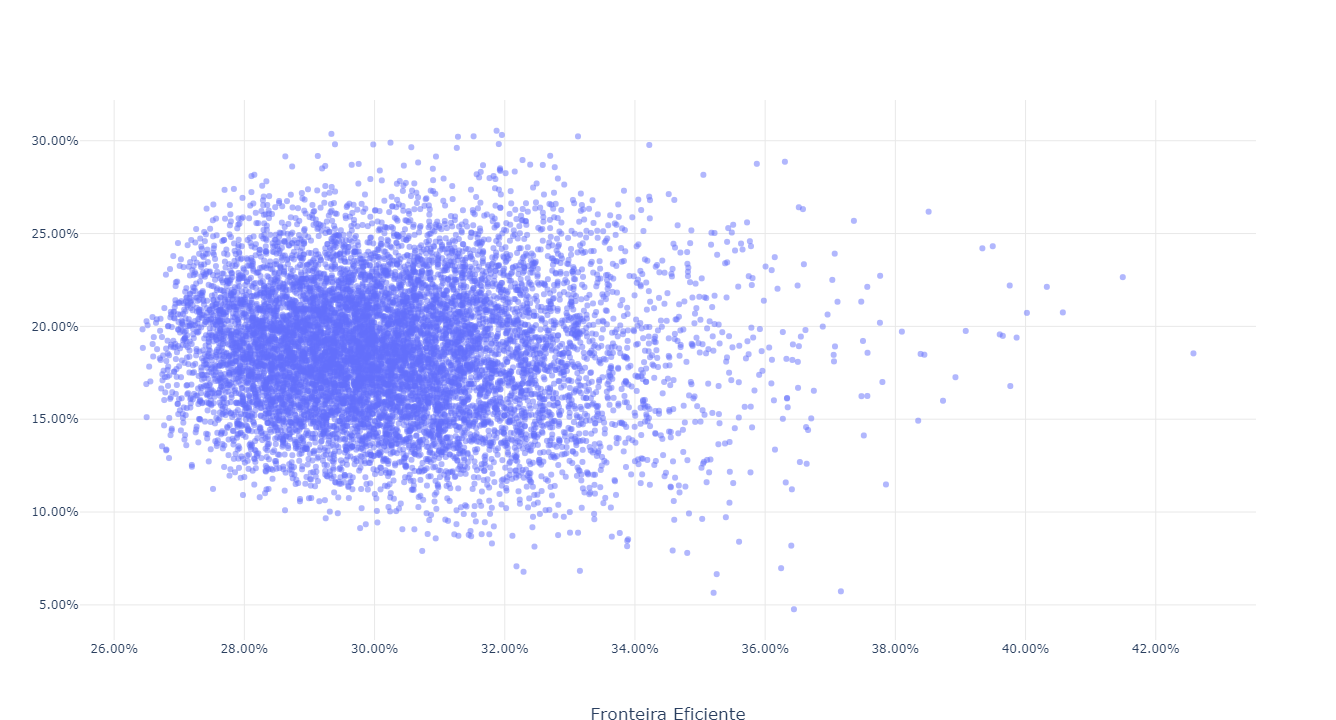

In [29]:
FronteiraEficiente = plg.Figure(plg.Scatter(x=Portfolios["Risco"],
                                            y=Portfolios["Retorno"],
                                            mode="markers", marker_symbol="circle", marker_opacity=0.5,
                                            name="Portfolios Simulados"))
FronteiraEficiente.update_layout(xaxis_tickformat=".2%", yaxis_tickformat=".2%")
Plot_Show(FronteiraEficiente, "Fronteira Eficiente")

- Portfólio de Menor Risco

In [30]:
PortfolioMenorRisco = Portfolios.iloc[Portfolios["Risco"].idxmin()]

In [31]:
PortfolioMenorRisco

Retorno     0.198404
Risco       0.264362
ITUB4.SA    0.233292
CPLE3.SA    0.141550
LREN3.SA    0.107768
EMBR3.SA    0.075790
PSSA3.SA    0.421937
GOAU4.SA    0.019664
Sharpe      0.750500
Name: 9088, dtype: float64

- Portfólio de Maior Retorno

In [32]:
PortfolioMaiorRetorno = Portfolios.iloc[Portfolios["Retorno"].idxmax()]

In [33]:
PortfolioMaiorRetorno

Retorno     0.305365
Risco       0.318746
ITUB4.SA    0.035292
CPLE3.SA    0.455693
LREN3.SA    0.374472
EMBR3.SA    0.007344
PSSA3.SA    0.078969
GOAU4.SA    0.048230
Sharpe      0.958020
Name: 1143, dtype: float64

- Portfólio de Melhor Performance

In [34]:
PortfolioMelhorSharpe = Portfolios.iloc[Portfolios["Sharpe"].idxmax()]

In [35]:
PortfolioMelhorSharpe

Retorno     0.303685
Risco       0.293373
ITUB4.SA    0.049082
CPLE3.SA    0.465195
LREN3.SA    0.086258
EMBR3.SA    0.006094
PSSA3.SA    0.307996
GOAU4.SA    0.085374
Sharpe      1.035150
Name: 2677, dtype: float64

- Fronteira Eficiente com Melhores Portifólios 

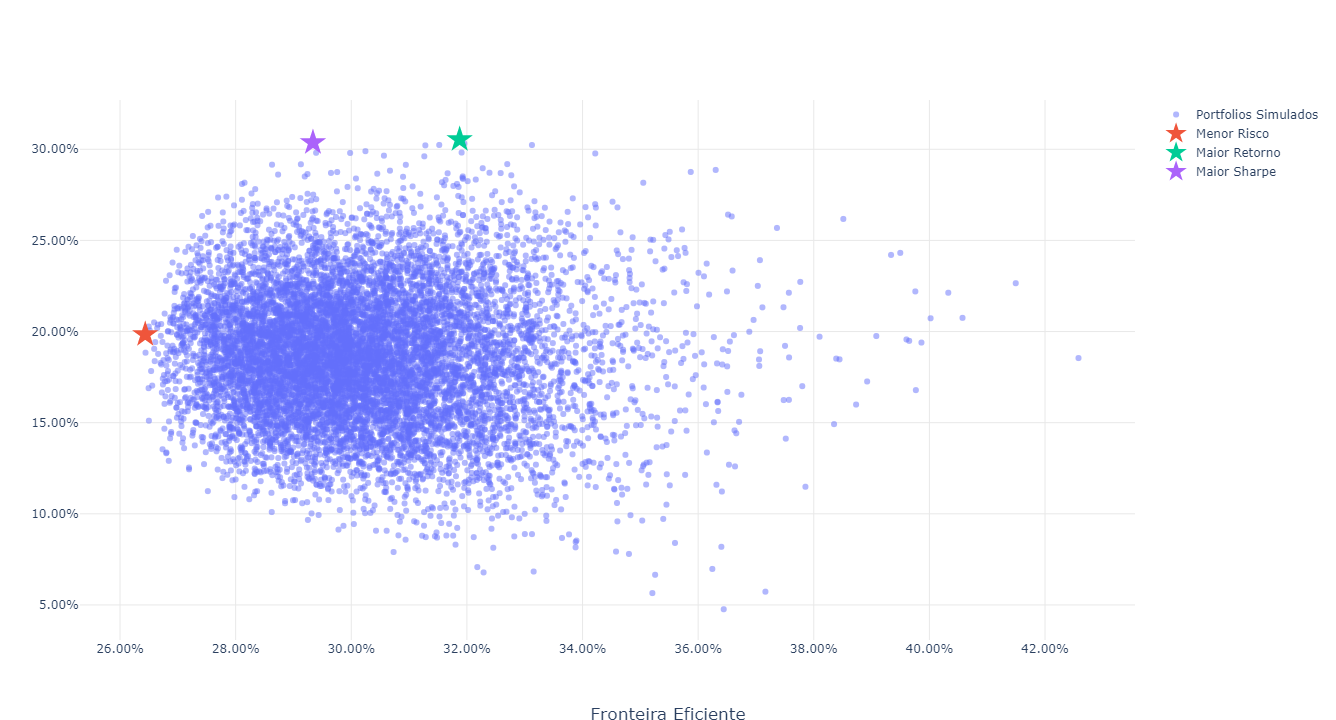

In [36]:
FronteiraEficiente = plg.Figure()

FronteiraEficiente.add_trace(plg.Scatter(x=Portfolios["Risco"],
                                         y=Portfolios["Retorno"],
                                         mode="markers", marker_symbol="circle", marker_opacity=0.5,
                                         name="Portfolios Simulados"))
FronteiraEficiente.add_trace(plg.Scatter(x=[PortfolioMenorRisco["Risco"]],
                                         y=[PortfolioMenorRisco["Retorno"]],
                                         mode="markers", marker_symbol="star", marker_size=20,
                                         name="Menor Risco"))
FronteiraEficiente.add_trace(plg.Scatter(x=[PortfolioMaiorRetorno["Risco"]],
                                         y=[PortfolioMaiorRetorno["Retorno"]],
                                         mode="markers", marker_symbol="star", marker_size=20,
                                         name="Maior Retorno"))
FronteiraEficiente.add_trace(plg.Scatter(x=[PortfolioMelhorSharpe["Risco"]],
                                         y=[PortfolioMelhorSharpe["Retorno"]],
                                         mode="markers", marker_symbol="star", marker_size=20,
                                         name="Maior Sharpe"))
FronteiraEficiente.update_layout(xaxis_tickformat=".2%", yaxis_tickformat=".2%")
Plot_Show(FronteiraEficiente, "Fronteira Eficiente")